# Convolutional Neural Networsk Project

## Sub-project 1:

## Solve Fashion_MNIST with LeNet architecture

In this project you will implement the LeNet architecture of Convolutional Neural Networks. First you will download the Fashion-MNIST dataset. Split into train/validation/test datasets and train the network. Finally, plot the learning curves (train/validation loss and accuracy) and show the confusion matrix.

### 1. Download Fashion-MNIST

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
data_train = datasets.FashionMNIST(
    root = 'data/fashion_mnist',
    train=True,
    transform = ToTensor(),
    download = True
)
data_test = datasets.FashionMNIST(
    root = 'data/fashion_mnist',
    train = False,
    transform = ToTensor(),
    download = True
)

data_train, data_eval = torch.utils.data.random_split(data_train, [50000, 10000])

100%|██████████| 26421880/26421880 [00:01<00:00, 19205882.13it/s]


Extracting data/fashion_mnist\FashionMNIST\raw\train-images-idx3-ubyte.gz to data/fashion_mnist\FashionMNIST\raw



100%|██████████| 29515/29515 [00:00<00:00, 1053438.99it/s]

Extracting data/fashion_mnist\FashionMNIST\raw\train-labels-idx1-ubyte.gz to data/fashion_mnist\FashionMNIST\raw



100%|██████████| 4422102/4422102 [00:00<00:00, 13853277.08it/s]


Extracting data/fashion_mnist\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to data/fashion_mnist\FashionMNIST\raw



100%|██████████| 5148/5148 [00:00<?, ?it/s]


Extracting data/fashion_mnist\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to data/fashion_mnist\FashionMNIST\raw



In [3]:
data_train

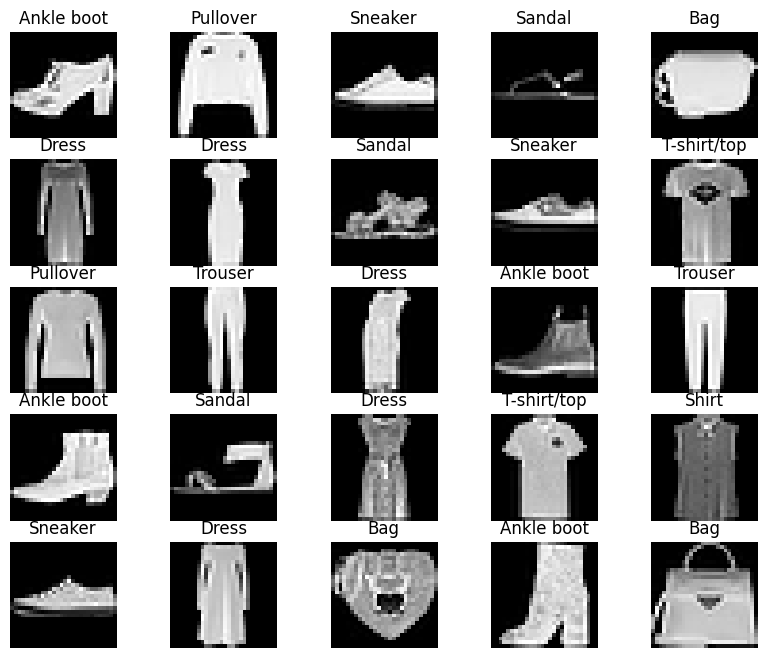

In [4]:
def tensor_to_image(data: torch.Tensor):
  img = plt.imshow(data.numpy())
  img.set_cmap('gray')
  plt.axis('on')
  plt.xticks([])
  plt.yticks([])

figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(data_train), size=(1,)).item()
    img, label = data_train[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(data_train.dataset.classes[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

### 2. Split the data into train / validation / test subsets. Make mini-batches, if necesssary.

In [5]:
from torch.utils.data import DataLoader

loaders = {
    'train' : torch.utils.data.DataLoader(data_train,
                                          batch_size=100,
                                          shuffle=True,
                                          num_workers=1),

    'validation'  : torch.utils.data.DataLoader(data_eval,
                                          batch_size=100,
                                          shuffle=True,
                                          num_workers=1),
    'test'  : torch.utils.data.DataLoader(data_test,
                                          batch_size=100,
                                          shuffle=True,
                                          num_workers=1),
}

### 3. Build the LeNet model

In [6]:
model = nn.Sequential(
    nn.Conv2d(1, 6, kernel_size=5, padding=2), nn.Sigmoid(),
    nn.AvgPool2d(kernel_size=2, stride=2),
    nn.Conv2d(6, 16, kernel_size=5), nn.Sigmoid(),
    nn.AvgPool2d(kernel_size=2, stride=2), nn.Flatten(),
    nn.Linear(16 * 5 * 5, 120), nn.Sigmoid(),
    nn.Linear(120, 84), nn.Sigmoid(), nn.Linear(84, len(data_train.dataset.classes))
)

# takes in a module and applies the specified weight initialization
def weights_init_uniform_rule(m):
    classname = m.__class__.__name__
    # for every Linear layer in a model..
    if classname.find('Linear') != -1:
        # get the number of the inputs
        n = m.in_features
        y = 1.0/np.sqrt(n)
        m.weight.data.uniform_(-y, y)
        m.bias.data.fill_(0)

model.apply(weights_init_uniform_rule)

Sequential(
  (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (1): Sigmoid()
  (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (4): Sigmoid()
  (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): Linear(in_features=400, out_features=120, bias=True)
  (8): Sigmoid()
  (9): Linear(in_features=120, out_features=84, bias=True)
  (10): Sigmoid()
  (11): Linear(in_features=84, out_features=10, bias=True)
)

In [17]:
for name, param in model.named_parameters():
    print(name)
    print(param)
    print("=============================")

0.weight
Parameter containing:
tensor([[[[-1.1686e+00,  1.1065e-03, -1.5749e+00, -2.2296e+00, -7.3352e-01],
          [-9.3643e-01,  2.4653e+00,  8.4635e-01, -9.7493e-01, -6.6573e-01],
          [-1.1335e+00,  3.7057e+00,  3.9353e+00, -1.4519e-01, -7.6336e-01],
          [-1.5998e+00,  1.9956e+00,  2.5722e+00, -1.9210e-02, -3.5262e-01],
          [-1.7027e+00,  5.6049e-01,  1.1872e+00, -2.6993e-01, -5.6084e-01]]],


        [[[-3.8479e-01,  1.1099e+00, -1.4217e-01, -1.8212e+00, -1.4130e+00],
          [-1.0363e+00,  2.2590e+00,  2.4910e-01, -1.9047e+00, -1.0810e+00],
          [-1.6347e+00,  2.9132e+00,  1.4890e+00, -1.0690e+00, -9.2089e-01],
          [-1.4974e+00,  2.3490e+00,  1.8373e+00, -4.8197e-01, -6.6468e-01],
          [-1.0509e+00,  1.2269e+00,  1.4049e+00,  2.8390e-01, -5.4355e-01]]],


        [[[-4.3321e-02, -1.1800e+00, -6.9548e-02,  9.6206e-01,  2.9154e-01],
          [-4.9822e-01, -1.6451e+00, -5.6649e-01,  9.5897e-01,  1.6398e-01],
          [-3.0199e-01, -1.9338e+00, 

### 4. Train the model on the dataset

In [7]:
# loss function
loss_f = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [8]:
loss_train = []
loss_valid = []

# training loop
def train(num_epochs, nn, loaders):
  min_valid_loss = np.inf

  if torch.cuda.is_available():
    nn.cuda()

  for epoch in range(num_epochs):

    # Train the model
    epoch_train_loss = 0
    # This line tells our NN that it's in the training mode
    # This will become relevant when we introduce layers that behave
    # differently in training and deployment/evaluation modes
    nn.train()
    for i, (images, labels) in enumerate(loaders['train']):
      if torch.cuda.is_available():
        images, labels = images.cuda(), labels.cuda()
      output = nn(images)
      loss = loss_f(output, labels)
      epoch_train_loss += loss.item()

      # clear gradients for this training step
      optimizer.zero_grad()

      # backpropagation, compute gradients
      loss.backward()
      # apply gradients
      optimizer.step()

    # Validate the model
    epoch_val_loss = 0
    nn.eval()
    for images_v, labels_v in loaders['validation']:
      if torch.cuda.is_available():
        images_v, labels_v = images_v.cuda(), labels_v.cuda()
      output = nn(images_v)
      loss_v = loss_f(output, labels_v)
      epoch_val_loss += loss_v.item()

    print(f'Epoch {epoch+1}')
    print(f'Training Loss: {epoch_train_loss / len(loaders["train"])}')
    print(f'Validation Loss: {epoch_val_loss / len(loaders["validation"])}')
    print('-------------------')

    loss_train.append(epoch_train_loss / len(loaders["train"]))
    loss_valid.append(epoch_val_loss / len(loaders["validation"]))

    if min_valid_loss > epoch_val_loss:
      print(f'Validation Loss Decreased({min_valid_loss}--->{epoch_val_loss}) \t Saving The Model')
      min_valid_loss = epoch_val_loss
      # Saving State Dict
      torch.save(nn.state_dict(), 'saved_model.pth')

train(10, model, loaders)

Epoch 1
Training Loss: 1.0031235708594322
Validation Loss: 0.5643897101283073
-------------------
Validation Loss Decreased(inf--->56.438971012830734) 	 Saving The Model
Epoch 2
Training Loss: 0.48935444533824923
Validation Loss: 0.4524460223317146
-------------------
Validation Loss Decreased(56.438971012830734--->45.24460223317146) 	 Saving The Model
Epoch 3
Training Loss: 0.4188118104636669
Validation Loss: 0.39217735394835473
-------------------
Validation Loss Decreased(45.24460223317146--->39.21773539483547) 	 Saving The Model
Epoch 4
Training Loss: 0.38230288127064704
Validation Loss: 0.35356801986694336
-------------------
Validation Loss Decreased(39.21773539483547--->35.356801986694336) 	 Saving The Model
Epoch 5
Training Loss: 0.35939110538363456
Validation Loss: 0.3442286966741085
-------------------
Validation Loss Decreased(35.356801986694336--->34.42286966741085) 	 Saving The Model
Epoch 6
Training Loss: 0.340665884912014
Validation Loss: 0.3330743074417114
-------------

### 5. Plot the training curves (Loss and accuracy)

Text(0.5, 1.0, 'Loss')

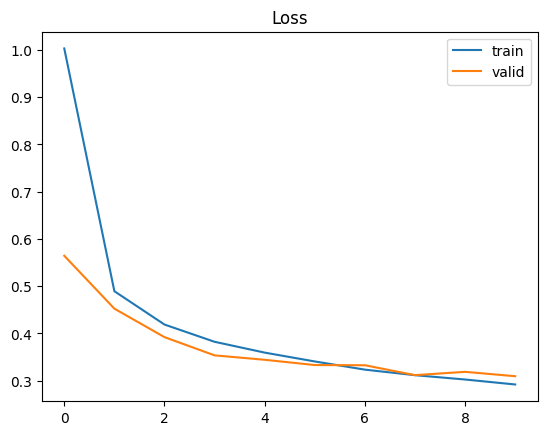

In [9]:
plt.plot(range(10), loss_train, label='train')
plt.plot(range(10), loss_valid, label='valid')
plt.legend()
plt.title('Loss')

In [10]:
def evaluate(model, test_loader):
  if torch.cuda.is_available():
    model.cuda()
  model.eval()
  correct = 0
  for test_imgs, test_labels in test_loader:
    if torch.cuda.is_available():
      test_imgs, test_labels = test_imgs.cuda(), test_labels.cuda()
    output = model(test_imgs)
    predicted = torch.max(output,1)[1]
    correct += (predicted == test_labels).sum()
  print("Test accuracy:{:.3f} ".format( float(correct) / (len(test_loader)*100)))

In [11]:
model.load_state_dict(torch.load('saved_model.pth'))
evaluate(model, loaders['test'])

Test accuracy:0.874 


### 6. Show the confusion matrix and accuracy on the test dataset.

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def evaluate_confusion_matrix(model: nn.Module, test_loader:DataLoader) -> np.ndarray:
    if torch.cuda.is_available():
        model.cuda()
    model.eval()

    lbl_pred = []
    lbl_test = []

    for test_imgs, test_labels in test_loader:
        if torch.cuda.is_available():
           test_imgs, test_labels = test_imgs.cuda(), test_labels.cuda()
        output = model(test_imgs)
        predicted = torch.max(output,1)[1]
        lbl_pred = predicted.numpy()
        lbl_test = test_labels.numpy()

    return confusion_matrix(lbl_test, lbl_pred)


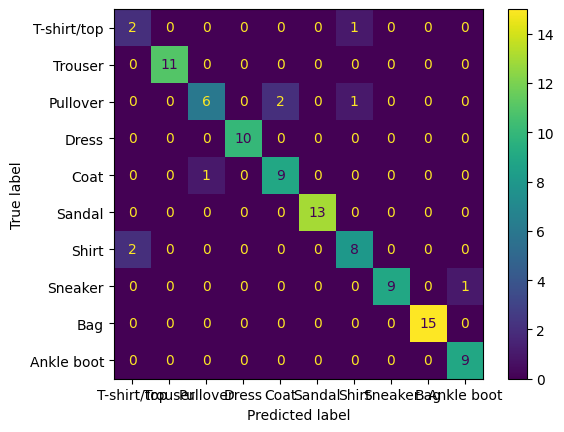

In [13]:
cm = evaluate_confusion_matrix(model, loaders['test'])
cm_plot = ConfusionMatrixDisplay(cm, display_labels=loaders['test'].dataset.classes)
cm_plot.plot()

### 7. Is LeNet better than the fully connected Neural Network trained in the project from lecture 3? Comment on the results

Answer:

## Sub-project 2:

## Use a pretrained model to solve

In this project you will download the Intel Image Classification dataset (https://www.kaggle.com/puneet6060/intel-image-classification/download).
Find a suitable pretrained Convolutional Neural Network and its weights. Fix the filters and retrain/finetune the top of the network. Show and comment on resuls.

Alternativelly, you can browse Kaggle for some interesting datasets like: Dogs vs Cats, Alien vs Predator, Doom vs Animal Crossing, CelebA, etc. Just don't use something easy like MNIST, Fashion-MNIST, etc.

In [14]:
# import libraries
import os
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import  torchvision
from torchvision.datasets.utils import extract_archive
import json
import time
import tqdm   # progress bar utilities

### 1. Download the data

In [ ]:
# I've downloaded the data on my local PC, extracted the archive file, uploaded a small subset of them (~50K)
# to my drive account and connected it to colab. This way, there is no need to bother about timeouts, remote resources and whatever
# To use the code in this solution, the structure to upload must be
# - <your drive root>
#   -datasets
#     -celeb_a
#       -img_align_celeba
#         -<all the pictures here>
#       - list_landmarks_align_celeba.txt
#
# links to download the files directly:
# - list_landmarks_align_celeba.txt:    https://drive.usercontent.google.com/download?id=0B7EVK8r0v71pd0FJY3Blby1HUTQ
# - img_align_celeba.zip:               https://drive.usercontent.google.com/download?id=0B7EVK8r0v71pZjFTYXZWM3FlRnM

# if you are running locally, this is superfluous
# let Colab access your drive folder
from google.colab import drive
drive.mount('/content/drive')


### 2. Preprocess the data.

(This might include resizing, augmenting, etc.)




In [ ]:
# The dataset I've chosen is already normalized way too big to use all at the same time, so I will skip preprocessing
# However, what I did is to write a custom dataset that can read from disk, in case you are not able to use the torchvision API
# Just upload the dataset to drive, give colab access to your drive account and you should be good to go
# Or run this locally, if you want to avoid timeout and other annoyances

class CelebA_Local(torch.utils.data.Dataset):
    """
    torch dataset that reads CelebA from disk
    """
    def __init__(self, csv_file, root_dir, transform_in=None, transform_out=None, max_rows=None):
        self.data = pd.read_csv(csv_file, skiprows=1, delim_whitespace=True, max_rows=max_rows)
        self.root_dir = root_dir
        self.transform_in = transform_in
        self.transform_out = transform_out
        self.num_features = len(self.data.columns)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
            
        img_name = os.path.join(
            self.root_dir,
            self.data.index[idx]
        )
        image = skimage.io.imread(img_name)
        features = self.data.iloc[idx]
        features = np.array(features, dtype=float)

        if self.transform_in:
            image = self.transform_in(image)
        if self.transform_out:
            features = self.transform_out(features)

        return (image, features)
    
    def __len__(self):
        return len(self.data)
    
    def get_feature_idx(self, feature_lbl: str):
        return self.data.columns.get_loc(feature_lbl)

# instantiate the dataset
# you can change these paths if your file structure is different,
# ie if you downloaded the dataset with the torchvision API
# just point to the same files
# if it complais that the files cannot be found, you can get hardcoded paths from
# Colab's "File" view (on the left panel). Just right click the folder you need click "copy path"
dataset = CelebA_Local(
    'datasets/list_landmarks_align_celeba.txt',
    'datasets/img_align_celeba',
    transform_in=torchvision.transforms.ToTensor(),
    max_rows=10000
)

C:\Users\carve\AppData\Local\Temp\ipykernel_8232\3882013891.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  self.data = pd.read_csv(csv_file, skiprows=1, delim_whitespace=True)


torch.Size([3, 218, 178])
(10,)


(-0.5, 177.5, 217.5, -0.5)

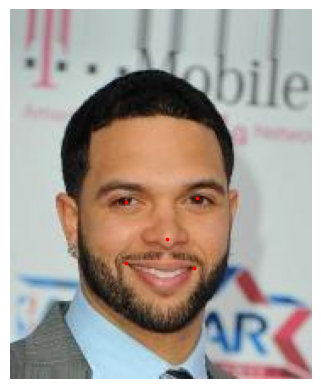

In [ ]:
# this is technically enough, but let's explore a bit the dataset before moving forward
image, labels = dataset.__getitem__(4242)
print(image.shape)
print(labels.shape)

pil_converter = torchvision.transforms.ToPILImage()
plt.imshow(pil_converter(image))
plt.scatter(labels[::2], labels[1::2], s=10, marker='.', c='r', label='labels')
plt.axis('off')

### 3. Split the data (train / test / validation) and make mini-batches.

In [ ]:
# pro tip: batch size makes a HUGE difference in compute time
# - on GPU: bigger batch size is almost always better.
#           (you can go almost all the way up to GPU RAM limit, altough it
#            is questionable for the hardware life AFAIK)
# - on CPU: balanced approach, the trade-off between memory bandwidth and compute time
#           is less clear. Try it out it will be different on different hardware,
#           with different data, and depending on what ops you do on them

dataset_len = len(dataset)
data_test_len  = int(dataset_len * 0.1)  # 10% test set
data_valid_len = int(dataset_len * 0.1)  # 10% valid set
data_train_len = dataset_len - data_test_len - data_valid_len
data_train, data_eval, data_test = torch.utils.data.random_split(dataset, [data_train_len, data_valid_len, data_test_len])
loaders = {
    'train' : torch.utils.data.DataLoader(data_train,
                                        batch_size=10,
                                        shuffle=True,
                                        num_workers=0,),

    'validation'  : torch.utils.data.DataLoader(data_eval,
                                        batch_size=10,
                                        shuffle=True,
                                        num_workers=0),
    'test'  : torch.utils.data.DataLoader(data_test,
                                        batch_size=3,
                                        shuffle=True,
                                        num_workers=0),
}

### 4. Download the pretrained architecture and weights.

This part might include some research and understanding of architecures and the type of data they were trained on.

In [ ]:
# downloading one of the off-the shelf torchvision models, using a specific set of weights
# (trained on a generic image classification task. Here we are looking for specific human features, is that a
# "similar enough" task? Probably not)
model_alexnet = torchvision.models.alexnet(weights=torchvision.models.AlexNet_Weights.IMAGENET1K_V1)
print(model_alexnet)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

### 5. Build the larger model that includes the pre-trained part and prepare it for training.

* Show the model summary so you are sure which components are included and how many (un)trainable parameters you have

In [ ]:
# freeze pre-trained network
for param in model_alexnet.parameters():
    param.requires_grad = False

# we could un-freeze the `classifier` part of the network, but we have onlt 40 features so that seems overkill
# so we are gonna create a smalled head and connect it to the conv features

# custom head
model_custom_head = nn.Sequential(
    nn.Dropout(p=0.1),
    nn.Flatten(),
    nn.Linear(
        256 * 6 * 6, # these are the inputs of our dense section. They need to be connected to the CNN section, so the dimensionality must match
                     # I got these numbers looking at the code in the torchvision.models.alexnet file
        512 # this is an arbitrary number that we need to design ourselves. 512 sits sort of halfway (256 * 6 * 6) and 10, so it looks reasonable
            # also, it MUST be a power of 2, it's the law. You can find more about it at https://en.wikipedia.org/wiki/Sarcasm
    ),  
    nn.ReLU(inplace=True),
    nn.Linear(512, 10), # our problem asks us to find 5 points in the image, in the form of X and Y coordinates, hence the 10 final labels
)

# creating the full model
# we don't need anything too fancy, so I'll just use the built-it module `nn.Sequential`
# it will simply apply each layer to the next
model_custom_alexnet = nn.Sequential(
    model_alexnet.features, # pre-trained, frozen layer
    model_alexnet.avgpool,  # if you look into the implementation of `nn.AdaptiveAvgPool2d`, you will see that it actually does not have
                            # trainable parameters. In cases like this, we could just create a new layer from scratch and, as long
                            # as the hyperparameters are the same, it will have the same result.
                            # if you don't know what a hyperparameter is, lecture 5 will explain i detal.
                            # For now, hyperparameter == parameters passed to the layer when we create it
    model_custom_head # this is the custom part that we just created
)

print(model_custom_alexnet)

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (1): AdaptiveAvgPool2d(output_size=(6, 6))
  (2): Sequential(
    (0): Dropout(p=0.1, inplace=False)
    (1): Flatten(start_dim=1, end_dim=-1)
    (2): Linear(in_features=9216, out_feat

In [ ]:
# double-check that everything is how it's supposed to be
# freeze pre-trained network
for name, param in model_custom_alexnet.named_parameters():
    tag = ' ' if param.requires_grad else 'F'
    print(f'[{tag}] {name}')

[F] 0.0.weight
[F] 0.0.bias
[F] 0.3.weight
[F] 0.3.bias
[F] 0.6.weight
[F] 0.6.bias
[F] 0.8.weight
[F] 0.8.bias
[F] 0.10.weight
[F] 0.10.bias
[ ] 2.2.weight
[ ] 2.2.bias
[ ] 2.4.weight
[ ] 2.4.bias


### 6. Train the trainable part of the model

In [ ]:
def training_loop_simple(num_epochs, nn, loaders, loss_f, optimizer, folder="./"):
    """
    Implements the most basic form of training loop.
    Useful to test specific architectures or optimizers

    Returns:
      - `loss_train`: list of the loss values computed on the training set, for each epoch
      - `loss_valid`: list of the loss values computed on the validation set, for each epoch
    """
    if not os.path.exists(folder):
        os.makedirs(folder)

    loss_train = []
    loss_valid = []
    training_time = []
    min_valid_loss = np.inf

    if torch.cuda.is_available():
        nn.cuda()

    for epoch in range(num_epochs):
        time_epoch_start = time.time()

        # Train the model
        epoch_train_loss = 0
        # This line tells our NN that it's in the training mode
        # This will become relevant when we introduce layers that behave
        # differently in training and deployment/evaluation modes
        nn.train()

        for i, (images, labels) in tqdm(enumerate(loaders['train']), total=len(loaders['train'])):
            if torch.cuda.is_available():
                images, labels = images.cuda(), labels.cuda()
            output = nn(images)
            loss = loss_f(output, labels)
            epoch_train_loss += loss.item()

            # clear gradients for this training step
            optimizer.zero_grad()

            # backpropagation, compute gradients
            loss.backward()
            # apply gradients
            optimizer.step()

        # Validate the model
        epoch_val_loss = 0
        nn.eval()
        for i, (images_v, labels_v) in tqdm(enumerate(loaders['validation']), total=len(loaders['validation'])):
            if torch.cuda.is_available():
                images_v, labels_v = images_v.cuda(), labels_v.cuda()
            output = nn(images_v)
            loss_v = loss_f(output, labels_v)
            epoch_val_loss += loss_v.item()

        time_epoch_end = time.time()
        print(f'Epoch {epoch+1}')
        print(f'Training Loss: {epoch_train_loss / len(loaders["train"])}')
        print(f'Validation Loss: {epoch_val_loss / len(loaders["validation"])}')
        print('-------------------')

        loss_train.append(epoch_train_loss / len(loaders["train"]))
        loss_valid.append(epoch_val_loss / len(loaders["validation"]))
        training_time.append(time_epoch_end-time_epoch_start)

        with open(os.path.join(folder, 'training_stats.json'), 'w') as outfile:
            json.dump(
                {'loss_train': loss_train, 'loss_valid': loss_valid, 'training_time': training_time},
                outfile,
            )

        if min_valid_loss > epoch_val_loss:
            print(f'Validation Loss Decreased({min_valid_loss}--->{epoch_val_loss}) \t Saving The Model')
            min_valid_loss = epoch_val_loss
            # Saving State Dict
            torch.save(nn.state_dict(), os.path.join(folder, 'saved_model.pth'))

training_loop_simple(
    num_epochs=10,
    nn=model_custom_alexnet,
    loaders=loaders,
    loss_f = nn.L1Loss(),   # different classifier! We are not looking for a single label amongst many, what we want is that all
                            # the labels are as close as possible to what we are asking. This loss function computes the Mean Absolute Error
                            # for each label, and that's what we want to minimize
    optimizer = torch.optim.Adam(model_custom_alexnet.parameters(), lr=0.01),
    folder='tranfer_learning'
)

### 7. Show the training plots and confusion matrix

In [ ]:
# training plots
training_stats = None
with open(os.path.join('tranfer_learning', 'training_stats.json'), 'r') as fp:
    training_stats = json.load(fp)

# plot stats
ax_0 = plt.subplot(2, 1, 1)
ax_0.plot(range(len(training_stats['loss_train'])), training_stats['loss_train'], label='loss_train')
ax_0.plot(range(len(training_stats['loss_valid'])), training_stats['loss_valid'], label='loss_valid')
plt.legend()

ax_1 = plt.subplot(2, 1, 2)
ax_1.plot(range(len(training_stats['training_time'])), training_stats['training_time'], label='training_time')
plt.legend()
plt.show()

In [ ]:
# we haven't talked about confusion matrices yet, so instead I will show the pictures and overlap the features,
# to try to understand at least if we are doing something good, or if we get something pleasantly silly

def evaluate_landmarks(model: torch.nn.Module, test_loader:torch.utils.data.DataLoader, n_batches=1):
    """Show image with landmarks"""

    curr_batch = 0
    pil_converter = torchvision.transforms.ToPILImage()
    for image, landmarks in test_loader:
        if curr_batch >= n_batches:
            break

        landmarks_predicted = model(image)

        for i in range(len(image)):
            ax = plt.subplot(n_batches, test_loader.batch_size, (curr_batch * test_loader.batch_size) + i + 1)
            plt.tight_layout()
            ax.imshow(pil_converter(image[i]))

            # the list[::] syntax is sugar syntax for a Range. Ranges are handy but a bit cryptic if you dont know about it
            # the three numbers in between the `:` are [start:stop:stride], and they default to
            #   - start: 0
            #   - stop: last element of the list
            #   - stride: 1
            # more info: https://docs.python.org/3/library/stdtypes.html#range
            ax.scatter(landmarks[i, ::2], landmarks[i, 1::2], s=10, marker='.', c='r', label='labels')
            ax.scatter(landmarks_predicted[i, ::2], landmarks_predicted[i, 1::2], s=10, marker='.', c='b', label='predicted')
            
            ax.set_title('MAE: {:.4f}'.format(mean_absolute_error(landmarks[i], landmarks_predicted[i])))
            plt.axis('off')
        
        curr_batch += 1
    plt.legend()

evaluate_landmarks(model_custom_alexnet, loaders['test'], n_batches=3)
plt.show()

### Finetune the model and show the plots, test data confusion matrix and accuracy.

In [ ]:
# unfreeze all
for param in model_custom_alexnet.parameters():
    param.requires_grad = True

training_loop_simple(
    num_epochs=10,
    nn=model_custom_alexnet,
    loaders=loaders,
    loss_f = nn.L1Loss(),   
    optimizer = torch.optim.Adam(
        model_custom_alexnet.parameters(),
        lr=0.001 # we need a much smaller learning rate here, so that we don't ruin the pre-trained weights
    ),
    folder='tranfer_learning'
)

### 9. Comment on the results. Are the results to your satisfaction? Which phase contributed to the improved performance? What was the most challenging aspect of the exercise? Ideas for improving the model?

Answer: